<a href="https://colab.research.google.com/github/doubledose-sudo/Project1/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training MLP Classifier...
Iteration 1, loss = 0.47123225
Iteration 2, loss = 0.33648064
Iteration 3, loss = 0.29857170
Iteration 4, loss = 0.27287532
Iteration 5, loss = 0.24978347
Iteration 6, loss = 0.23310347
Iteration 7, loss = 0.21985897
Iteration 8, loss = 0.20491206
Iteration 9, loss = 0.19526687
Iteration 10, loss = 0.18244657
Iteration 11, loss = 0.17575119
Iteration 12, loss = 0.16296872
Iteration 13, loss = 0.15459651
Iteration 14, loss = 0.14864168
Iteration 15, loss = 0.14076151
Iteration 16, loss = 0.13566243
Iteration 17, loss = 0.12650947
Iteration 18, loss = 0.12323849
Iteration 19, loss = 0.12018651
Iteration 20, loss = 0.11104488

Accuracy: 0.886

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.75      0.85      0.80      1000
           3       0.91      0.88      0.90      1000
           4       0.81      

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


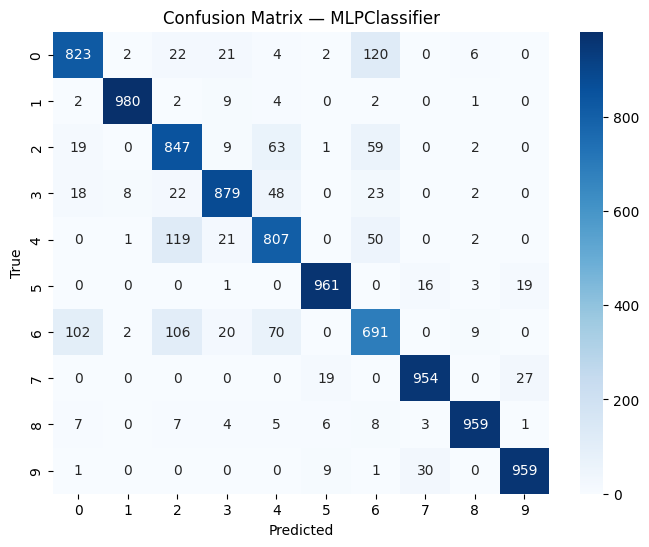

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# your code here
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


mlp = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=20,
    random_state=42,
    verbose=True
)

print("Training MLP Classifier...")
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)


print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — MLPClassifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 3. Fashion-MNIST image classification  using pytorch

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

In [16]:
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# your code here
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:, None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

train_ds = TensorDataset(torch.from_numpy(X_tr), torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        return self.net(x)

model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


def train_model(model, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        train_loss = 0

        for X, y in train_loader:
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            out = model(X)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        model.eval()
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for X, y in val_loader:
                X, y = X.to(device), y.to(device)
                preds = model(X)
                _, predicted = torch.max(preds, 1)
                val_correct += (predicted == y).sum().item()
                val_total += y.size(0)

        val_acc = val_correct / val_total
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.3f}, Val Acc={val_acc:.4f}")


train_model(model, train_loader, val_loader, epochs=10)


model.eval()
test_preds, test_labels = [], []

with torch.no_grad():
    for X, y in test_loader:
        X = X.to(device)
        preds = model(X)
        _, pred_labels = torch.max(preds, 1)
        test_preds.extend(pred_labels.cpu().numpy())
        test_labels.extend(y.numpy())

acc = accuracy_score(test_labels, test_preds)
print("\nTest Accuracy:", acc)
print("\nClassification Report:\n", classification_report(test_labels, test_preds))

cm = confusion_matrix(test_labels, test_preds)
print("\nConfusion Matrix:\n", cm)


Using device: cpu
Using device: cpu
Epoch 1: Train Loss=231.696, Val Acc=0.8385
Epoch 2: Train Loss=155.902, Val Acc=0.8523
Epoch 3: Train Loss=138.118, Val Acc=0.8724
Epoch 4: Train Loss=126.609, Val Acc=0.8725
Epoch 5: Train Loss=119.814, Val Acc=0.8790
Epoch 6: Train Loss=113.445, Val Acc=0.8766
Epoch 7: Train Loss=107.744, Val Acc=0.8835
Epoch 8: Train Loss=103.178, Val Acc=0.8789
Epoch 9: Train Loss=98.677, Val Acc=0.8804
Epoch 10: Train Loss=94.089, Val Acc=0.8896

Test Accuracy: 0.8855

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.80      0.80      1000
           3       0.88      0.89      0.88      1000
           4       0.80      0.80      0.80      1000
           5       0.99      0.95      0.97      1000
           6       0.70      0.71      0.70      1000
           7       0.94      0.96      0.95 